In [1]:
from data_preparation import make_train_datasets, make_test_dataset, load_dataset, add_channel, normalize, to_tensor
from utils import get_random_image_label_pair
from unet import ConvBlock, Downsample, UNet
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import random


In [2]:
input_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\train\raw"
label_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\train\label"
test_input_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\test\raw"
test_label_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\test\label"

In [3]:
# i, l = load_dataset(input_data_dir, label_data_dir, stack_axis=0)
# i1,l1 = get_random_image_label_pair(i,l)
# i2,l2 = add_channel(i1, l1, axis_to_use=0)
# i3,l3 = normalize(i2,l2)
# i4,l4 = to_tensor(i3,l3)
# conblck = nn.Conv2d(1, 1, kernel_size=3, padding=2)
# i5 = conblck(i4)
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(i5.detach().numpy()[0,...])
# ax[1].imshow(l4[0,...])


In [4]:
#create the train and validation datasets
train_dataset, val_dataset = make_train_datasets(input_data_dir, label_data_dir, transform=None, validation_fraction=0.20, stack_axis=0, shuffle_data=True)
test_dataset = make_test_dataset(test_input_data_dir, test_label_data_dir, transform=None, stack_axis=0)

print(type(train_dataset))
print(type(val_dataset))
print(type(test_dataset))



<class 'data_preparation.DatasetWithTransform'>
<class 'data_preparation.DatasetWithTransform'>
<class 'data_preparation.DatasetWithTransform'>


<class 'torch.Tensor'>
torch.Size([1, 928, 684])


c:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\code\data_preparation.py:143: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:281.)
  return torch.from_numpy(image), torch.tensor([target], dtype=torch.int64)


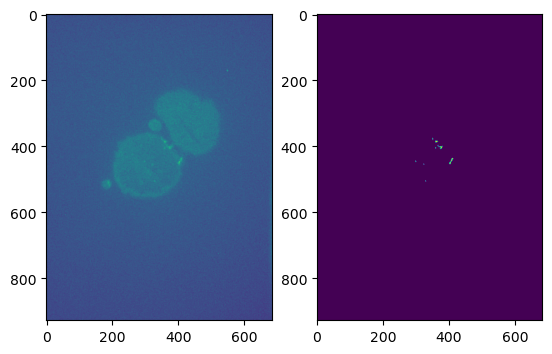

In [5]:
#get a random item from the train dataset
random_index = random.choice(range(train_dataset.__len__()))
train_data_item, train_label_item = train_dataset.__getitem__(random_index)
print(type(train_data_item))
fig, ax = plt.subplots(1,2)
ax[0].imshow(train_data_item.detach().numpy()[0,...])
ax[1].imshow(train_label_item[0,...])

print(train_data_item.shape)


In [6]:
# #test convolutional block
# test_conv_block = ConvBlock(in_channels=1,
#                             out_channels=1,
#                             kernel_size=3,
#                             padding="same")

# test_conv_block_for = test_conv_block.forward(train_data_item)
# print(type(test_conv_block))
# print(test_conv_block_for.shape)

# test_conv_block_for_numpy_2D = test_conv_block_for.detach().numpy()[0,...]

# print(type(test_conv_block_for_numpy_2D))
# print(np.unique(test_conv_block_for_numpy_2D))

# fig1, ax1 = plt.subplots(1,2)
# ax1[0].imshow(test_conv_block_for.detach().numpy()[0,...])
# ax1[1].imshow(train_label_item[0,...])


In [7]:
# #test downsampling
# test_downsampling = Downsample(downsample_factor=2)
# test_downsampling_for = test_downsampling.forward(test_conv_block_for)

# print(type(test_downsampling_for))
# print(test_downsampling_for.shape)

# fig2, ax2 = plt.subplots(1,2)
# ax2[0].imshow(test_downsampling_for.detach().numpy()[0,...])
# ax2[1].imshow(train_label_item[0,...])



In [8]:
# #test upsampling
# print(test_downsampling_for.shape)
# test_upsample = nn.Upsample(scale_factor=2, mode='nearest')
# test_upsample_for = test_upsample(test_downsampling_for)

# print(test_upsample_for.shape)
# plt.imshow(test_upsample_for.detach().numpy()[0,...])

In [9]:
# #test crop and concat    

# print(test_conv_block_for.size())
# print(test_downsampling_for.size())


# x_target_size = test_conv_block_for.size()[:-2] + test_downsampling_for.size()[-2:]
# # x_target_size = test_conv_block_for.size()[-2:]
# print(x_target_size)

# for a,b in zip(test_conv_block_for.size(), x_target_size):
#     print("--- dim", a, b)
#     print("diff", a-b)
#     print("offset", (a-b)//2)

# print("===")
# print("===")
# offset_s = tuple((a - b) // 2 for a, b in zip(test_conv_block_for.size(), x_target_size))
# print(offset_s)
# print("===")
# print("===")

# for o,s in zip(test_conv_block_for.size(), offset_s):
#     print("-.-.", o,s)
#     sl = slice(o, o+s)
#     print(sl)

# slice_s = tuple(slice(o, o+s) for o,s in zip(offset_s, x_target_size))
# print(slice_s)


# print("")
# print("")
# print("")
# print("===")
# print("===")
# print("===")
# print("===")
# res_ult = test_conv_block_for[slice_s]
# print(test_conv_block_for.size())
# print(res_ult.size())



In [10]:
#add dimension to train_data_item to mimic the minibatch
input_with_all_dim = train_data_item.unsqueeze_(0)
print(input_with_all_dim.size())

torch.Size([1, 1, 928, 684])


In [18]:
#test the UNet class
unet_network = UNet(depth=3,
                    in_channels=1,
                    out_channels=1,
                    final_activation="Sigmoid",
                    num_fmaps=64,
                    fmap_inc_factor=4,
                    downsample_factor=2,
                    kernel_size=3,
                    padding="same",
                    upsample_mode="nearest")

print(input_with_all_dim.size())
test_unet = unet_network(input_with_all_dim)
print("=== FINAL")
print(test_unet.size())


torch.Size([1, 1, 928, 684])
=== FINAL
torch.Size([1, 1, 928, 684])


c:\Users\aless\anaconda3\envs\pip2_segmentation\Lib\site-packages\torch\nn\modules\module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[0.5033596  0.50400966 0.50492394 ... 0.5846345  0.58755803 0.5908334 ]


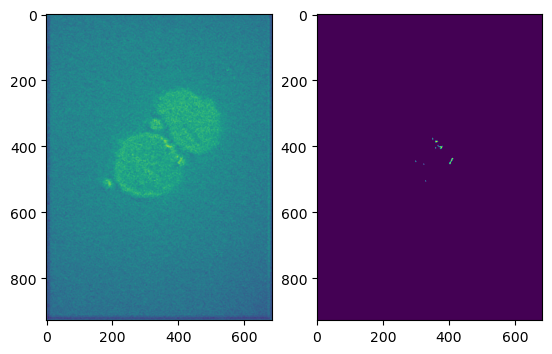

In [17]:
numpy_test_unet = test_unet.detach().numpy()[0,0,...]
print(np.unique(numpy_test_unet))

fig3, ax3 = plt.subplots(1,2)
ax3[0].imshow(numpy_test_unet)
ax3[1].imshow(train_label_item[0,...])
